In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import os

In [2]:
on_df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.3_0.5_0.7_COMBINED.csv")
off_df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_OFF_take_0.3_0.5_0.7_COMBINED.csv")
static_df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_OFF_take_COMBINED_STATIC.csv")
mixup_df = pd.read_csv("datasets/cn_k12_math_problems_completions_command-r-plus-08-2024_191_3_5_ON_take_0.3_0.5_0.7_COMBINED_MIXUP.csv")

In [3]:
on_df.head()

,Unnamed: 0,row_id,problem,ground_truth_solution,solution_idx,candidate_solution,verification_reasoning,verification,prefix,prefix_take_0.1,...,completion_idx,prefix_take_0.3_completion,prefix_take_0.3_completion_verification_reasoning,prefix_take_0.3_completion_verification,prefix_take_0.5_completion,prefix_take_0.5_completion_verification_reasoning,prefix_take_0.5_completion_verification,prefix_take_0.7_completion,prefix_take_0.7_completion_verification_reasoning,prefix_take_0.7_completion_verification
0,0,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...",...,0,\nA: To check if the graph passes through the ...,The final answer provided in the ground truth ...,True,\n\boxed{\text{A}}$ is false.\n\nB: The graph ...,The final answer provided in the ground truth ...,True,"$\frac{-2}{x}$ decreases, because the denomina...",The final answer in the ground truth solution ...,False
1,1,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...",...,1,"\nA: To check if the graph passes through $(1,...",The final answer in the ground truth solution ...,False,A is **false**. B: The graph of $y = \frac{-2}...,The final answer provided in the ground truth ...,False,"$\frac{-2}{x}$ decreases, so $y$ decreases as ...",The final answer in the ground truth solution ...,False
2,2,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...",...,2,\nA: The graph of the function passes through ...,The final answer in the ground truth solution ...,True,\n\boxed{\text{A}}$ is false.\n\nB: The graph ...,The final answer in the ground truth solution ...,True,"$\frac{-2}{x}$ decreases, so $y$ decreases as ...",The final answer provided in the ground truth ...,False
3,3,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...",...,3,\nA: The graph of the function passes through ...,The final answer provided in the ground truth ...,False,\n\boxed{\text{A}}$ is false. B: The graph of ...,The final answer provided in the ground truth ...,True,"$y = \frac{-2}{x}$ decreases. So, statement C ...",The final answer provided in the ground truth ...,False
4,4,1,"If the point $(-1,2)$ lies on the graph of the...","Given that the point $(-1,2)$ lies on the grap...",0,"We are given the point $(-1, 2)$ which lies on...",The final answer provided in the ground truth ...,False,NaN,"We are given the point $(-1, 2)$ which lies on...",...,4,\nA: The graph of the function passes through ...,The final answer in the ground truth solution ...,True,\n\boxed{\text{A}}$\n\nis false. B: The graph ...,The final answer provided in the ground truth ...,False,"$\frac{-2}{x}$ decreases, because the denomina...",The final answer provided in the ground truth ...,False


In [18]:
print(f"on_df columns: {on_df.columns.tolist()}\n")
print(f"off_df columns: {off_df.columns.tolist()}\n")
print(f"static_df columns: {static_df.columns.tolist()}\n")
print(f"mixup_df columns: {mixup_df.columns.tolist()}\n")

# Note that static_df is the one that has "different" completion columns, because for this one it didn't make sense to take differing portions of incorrect solutions as prefixes.
# Instead, for static_df, we were just randomly selecting a static prefix for each incorrect solution for each problem.


on_df columns: ['Unnamed: 0', 'row_id', 'problem', 'ground_truth_solution', 'solution_idx', 'candidate_solution', 'verification_reasoning', 'verification', 'prefix', 'prefix_take_0.1', 'prefix_take_0.3', 'prefix_take_0.5', 'prefix_take_0.7', 'completion_idx', 'prefix_take_0.3_completion', 'prefix_take_0.3_completion_verification_reasoning', 'prefix_take_0.3_completion_verification', 'prefix_take_0.5_completion', 'prefix_take_0.5_completion_verification_reasoning', 'prefix_take_0.5_completion_verification', 'prefix_take_0.7_completion', 'prefix_take_0.7_completion_verification_reasoning', 'prefix_take_0.7_completion_verification']

off_df columns: ['row_id', 'problem', 'ground_truth_solution', 'solution_idx', 'candidate_solution', 'verification_reasoning', 'verification', 'prefix_take_0.1', 'prefix_take_0.3', 'prefix_take_0.5', 'prefix_take_0.7', 'completion_idx', 'prefix_take_0.3_completion', 'prefix_take_0.5_completion', 'prefix_take_0.7_completion', 'prefix_take_0.3_completion_verifi

In [11]:
print(f"on_df: {len(on_df)} rows and {on_df["row_id"].nunique()} problems")
print(f"off_df: {len(off_df)} rows and {off_df["row_id"].nunique()} problems")
print(f"static_df: {len(static_df)} rows and {static_df["row_id"].nunique()} problems")
print(f"mixup_df: {len(mixup_df)} rows and {mixup_df["row_id"].nunique()} problems")

# What accounts for the slight difference in the number of problems for the off_df?
# When we try to generate prefixes (eg for off_df), if we're unable to generate a prefix for a given problem within (eg) 35 attempts, we don't include that completion in the output dataframe.
# So off_df has completions for every row_id, as we can see, but some of the row_ids will have (eg) 2 incorrect solutions rather than 3.

# Get counts of solution_idxs per row_id in off_df, sorted from lowest to highest
solution_idx_counts = off_df.groupby('row_id')['solution_idx'].nunique().sort_values()
print("\nDistribution of solution_idxs per row_id in off_df:")
print(solution_idx_counts.value_counts().sort_index())
# Get row_ids with fewer than 3 solution_idxs, and their counts
row_ids_with_fewer_solutions = solution_idx_counts[solution_idx_counts < 3]
print("\nRow IDs in off_df with fewer than 3 solution_idxs and their counts:")
for row_id, count in row_ids_with_fewer_solutions.items():
    print(f"Row ID {row_id}: {count} solutions")



on_df: 2865 rows and 191 problems
off_df: 2850 rows and 191 problems
static_df: 2865 rows and 191 problems
mixup_df: 2865 rows and 191 problems

Distribution of solution_idxs per row_id in off_df:
solution_idx
1      1
2      1
3    189
Name: count, dtype: int64

Row IDs in off_df with fewer than 3 solution_idxs and their counts:
Row ID 482: 1 solutions
Row ID 340: 2 solutions


In [31]:
def plot_prefix_strategy_comparison(combined_df: pd.DataFrame, verification_columns: list[str], name: str):
    """
    Creates a figure with two subplots comparing prefix strategies:
    1. Overall success rates by strategy
    2. Distribution of success rates across problems
    
    Args:
        combined_df: DataFrame containing prefix completion verification columns
        verification_columns: List of column names containing verification results
        name: Name of the strategy, used for the filename of the saved plot, e.g. "On-Policy" or "On-Policy-Mixup" or "Static"
    Returns:
        None (displays plot)
    """
    fig = plt.figure(figsize=(15, 10))
    gs = plt.GridSpec(2, 1, figure=fig)

    # 1. Overall Success Rates by Strategy
    ax1 = fig.add_subplot(gs[0, 0])
    strategy_success = pd.DataFrame({
        col: combined_df[col].mean() for col in verification_columns
    }, index=['Success Rate']).T

    strategy_success.plot(kind='bar', ax=ax1)
    # Add value labels on top of bars as percentages
    for i, v in enumerate(strategy_success['Success Rate']):
        ax1.text(i, v, f'{v*100:.1f}%', ha='center', va='bottom')
    ax1.set_title('Overall Success Rate by Prefix Strategy')
    ax1.set_ylabel('Success Rate (%)')
    ax1.set_xlabel('Strategy')
    # Convert y-axis to percentage
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y * 100)))
    # Rotate x-axis labels to horizontal
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

    # 2. Per-Problem Success Distribution
    ax2 = fig.add_subplot(gs[1, 0])
    problem_success = combined_df.groupby('row_id').agg({
        col: 'mean' for col in verification_columns
    })

    # Create violin plot with individual points
    sns.violinplot(data=problem_success, ax=ax2, alpha=0.6)
    sns.stripplot(data=problem_success, ax=ax2, size=2, alpha=0.1, color='black')
    ax2.set_title('Distribution of Success Rates Across Problems')
    ax2.set_ylabel('Success Rate')

    # Add text annotations for quartiles and mean to violin plot
    for i, col in enumerate(problem_success.columns):
        stats = problem_success[col].describe()
        # Add text for quartiles and mean
        y_pos = [stats['25%'], stats['50%'], stats['75%'], stats['mean']]
        labels = [f'Q1: {stats["25%"]:.3f}', f'Med: {stats["50%"]:.3f}', 
                 f'Q3: {stats["75%"]:.3f}', f'Mean: {stats["mean"]:.3f}']
        for y, label in zip(y_pos, labels):
            ax2.text(i + 0.15, y, label, ha='left', va='center', fontsize=8)

    plt.tight_layout()

    # Save figure
    if not os.path.exists("figures"):
        os.makedirs("figures")
    plt.savefig(f"figures/prefix_strategy_comparison_{name}_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.png") 
    
    plt.show()

    # Print summary statistics
    print("\nOverall Success Rates:")
    print(strategy_success)

    print("\nPer-Strategy Statistics across Problems:")
    print(problem_success.describe())



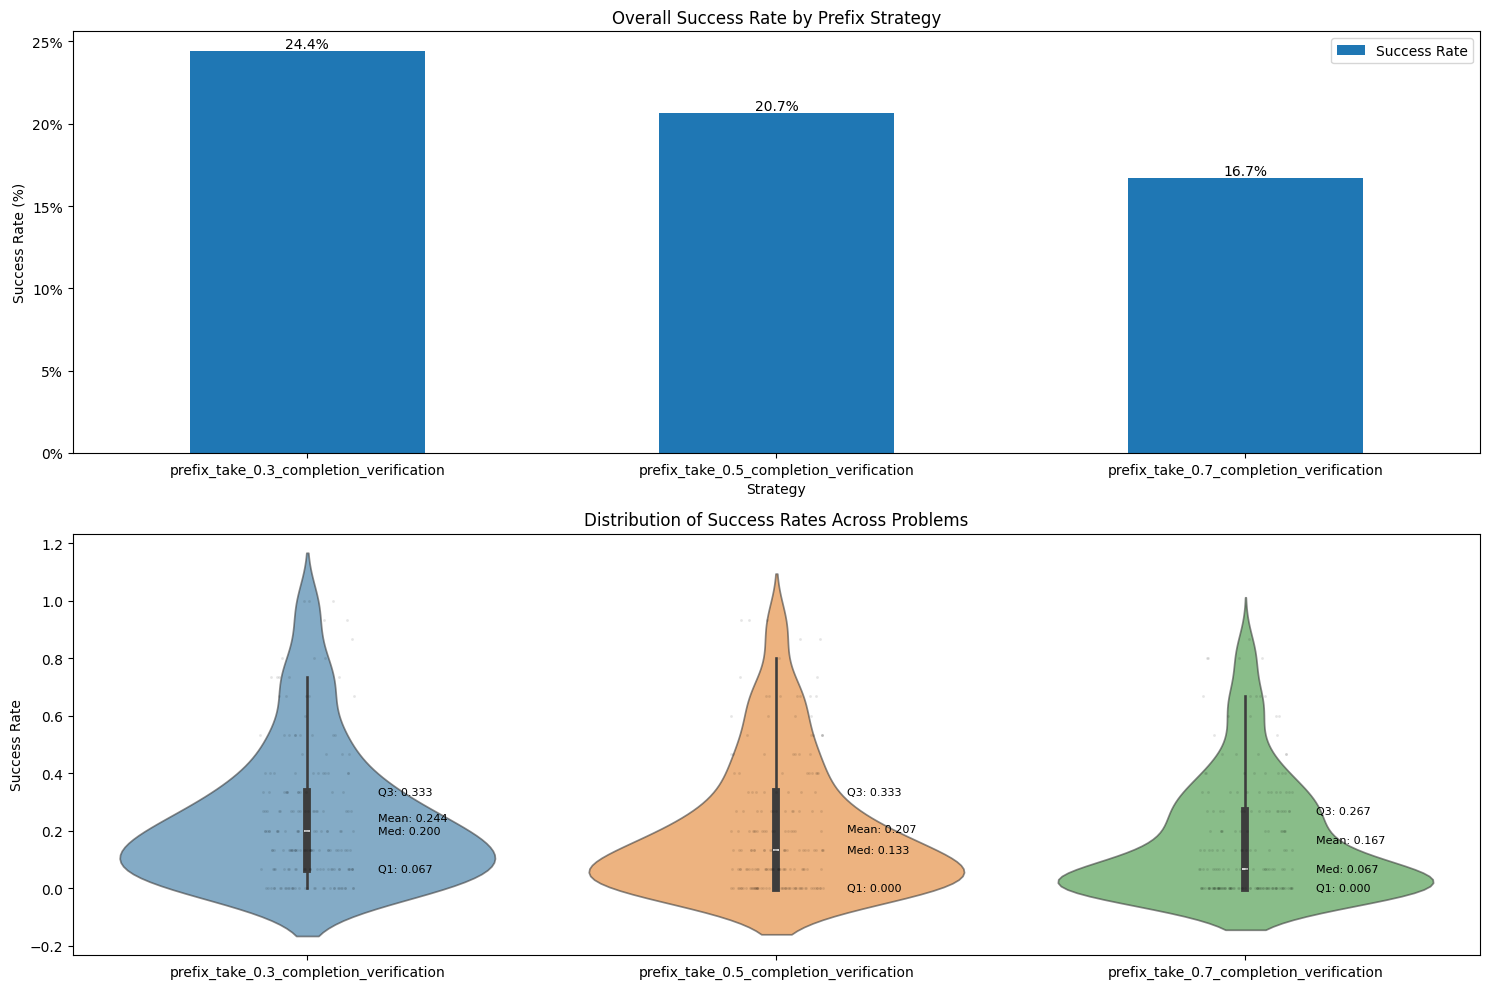


Overall Success Rates:
                                         Success Rate
prefix_take_0.3_completion_verification      0.243979
prefix_take_0.5_completion_verification      0.206632
prefix_take_0.7_completion_verification      0.167190

Per-Strategy Statistics across Problems:
       prefix_take_0.3_completion_verification  \
count                               191.000000   
mean                                  0.243979   
std                                   0.238459   
min                                   0.000000   
25%                                   0.066667   
50%                                   0.200000   
75%                                   0.333333   
max                                   1.000000   

       prefix_take_0.5_completion_verification  \
count                               191.000000   
mean                                  0.206632   
std                                   0.230083   
min                                   0.000000   
25%              

In [32]:
plot_prefix_strategy_comparison(
    on_df,
    verification_columns=["prefix_take_0.3_completion_verification", "prefix_take_0.5_completion_verification", "prefix_take_0.7_completion_verification"],
    name="On-Policy"
)


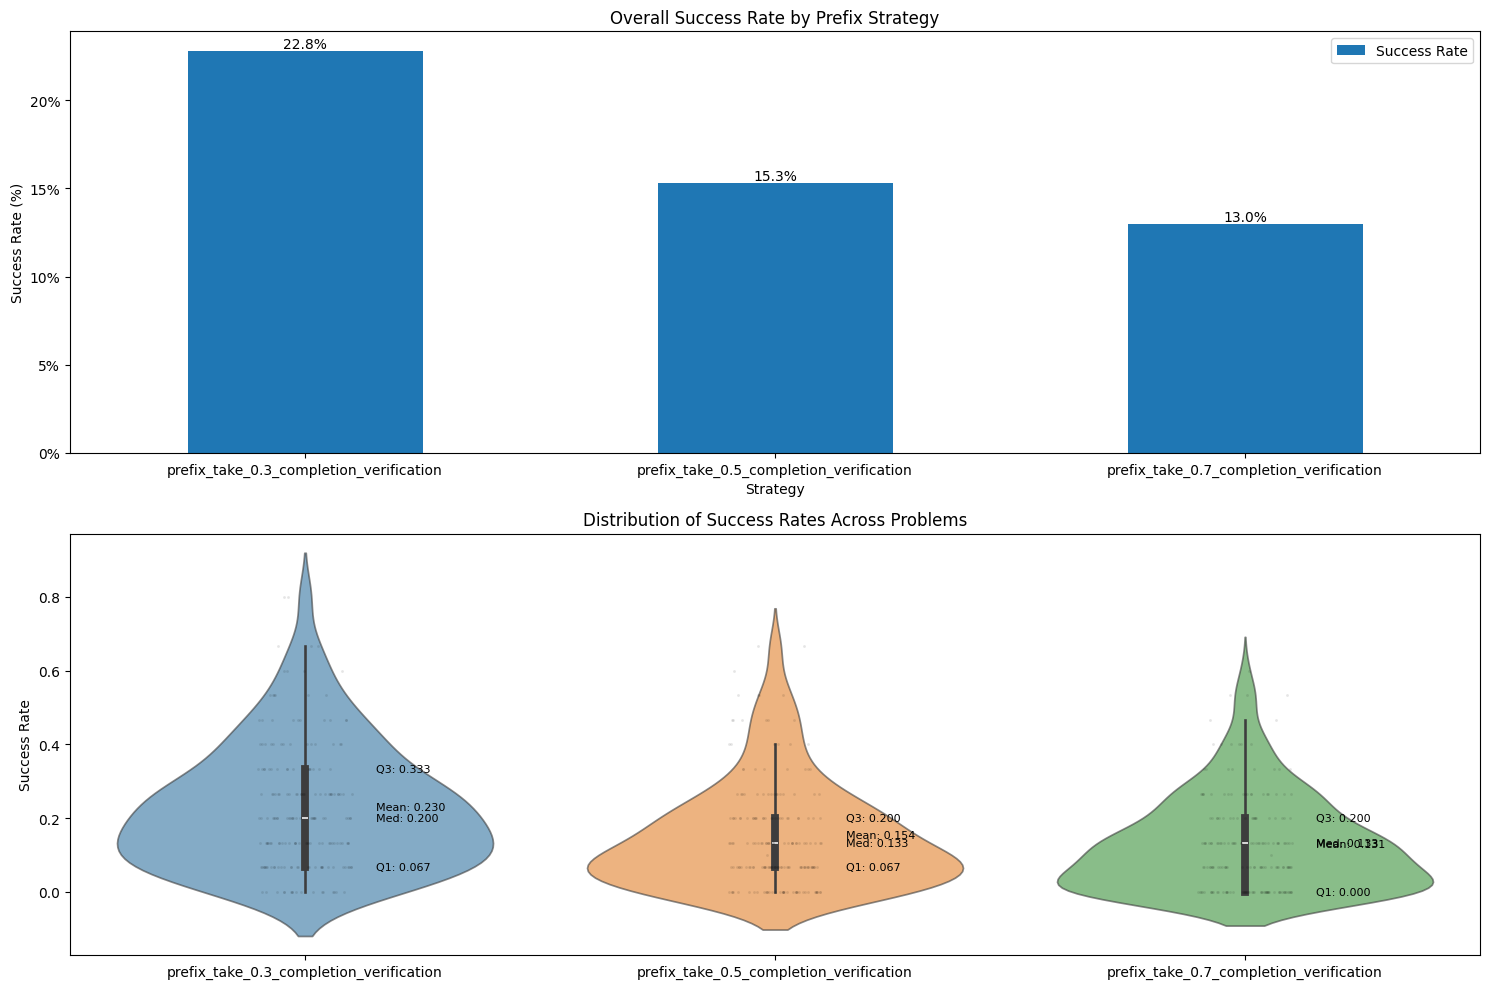


Overall Success Rates:
                                         Success Rate
prefix_take_0.3_completion_verification      0.227719
prefix_take_0.5_completion_verification      0.152982
prefix_take_0.7_completion_verification      0.129825

Per-Strategy Statistics across Problems:
       prefix_take_0.3_completion_verification  \
count                               191.000000   
mean                                  0.230366   
std                                   0.171227   
min                                   0.000000   
25%                                   0.066667   
50%                                   0.200000   
75%                                   0.333333   
max                                   0.800000   

       prefix_take_0.5_completion_verification  \
count                               191.000000   
mean                                  0.153752   
std                                   0.146326   
min                                   0.000000   
25%              

In [33]:
plot_prefix_strategy_comparison(
    off_df,
    verification_columns=["prefix_take_0.3_completion_verification", "prefix_take_0.5_completion_verification", "prefix_take_0.7_completion_verification"],
    name="Off-Policy"
)


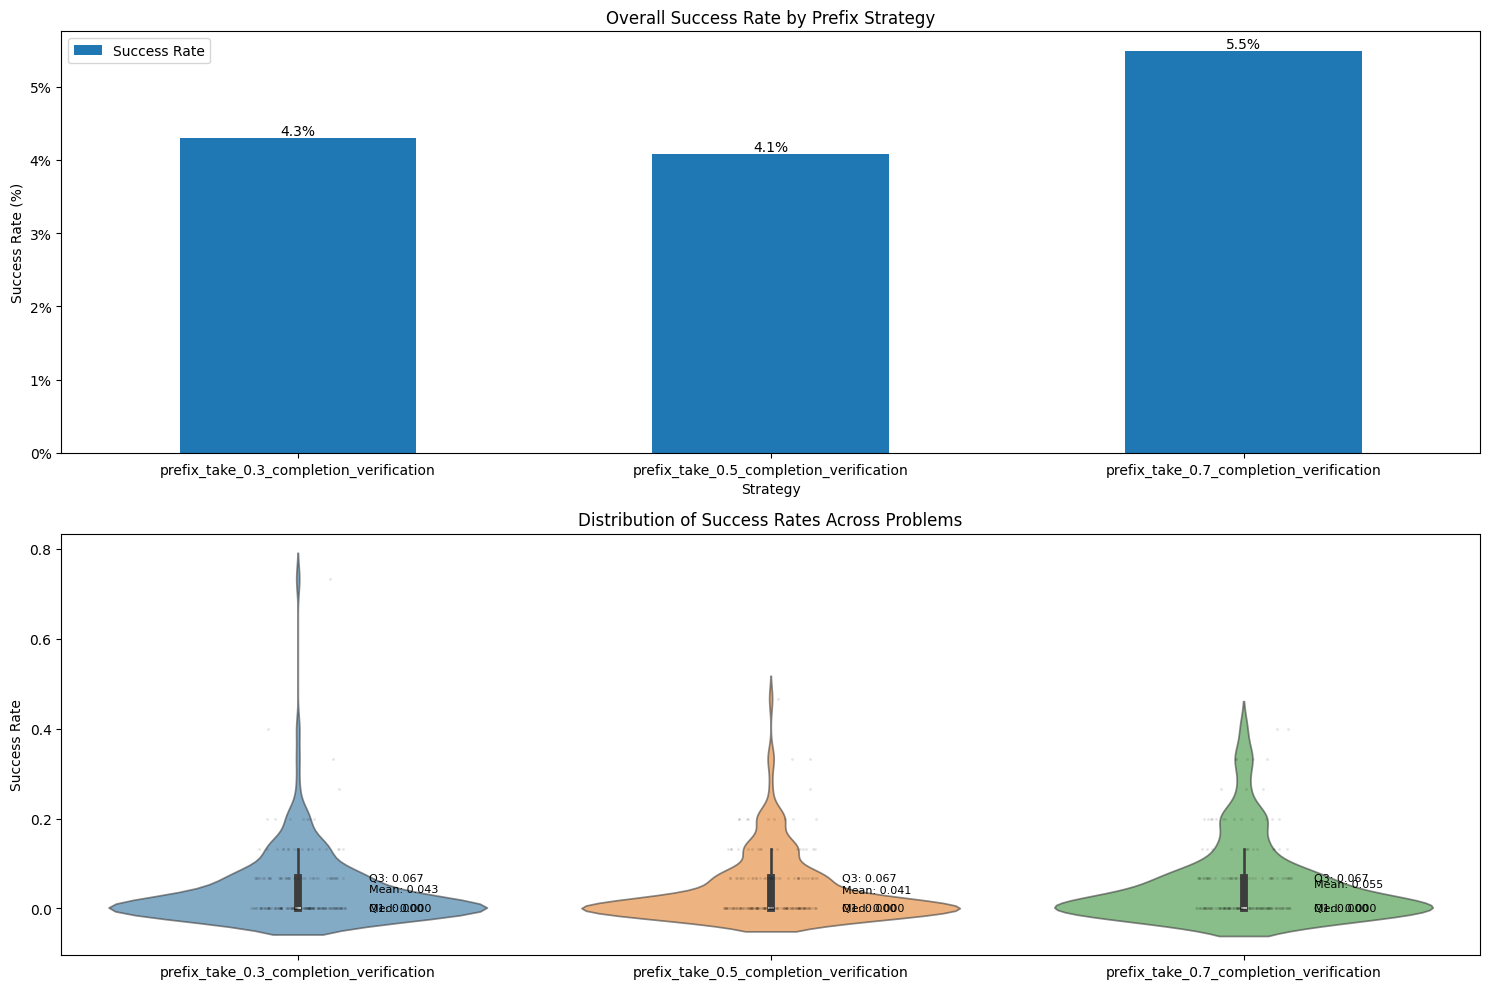


Overall Success Rates:
                                         Success Rate
prefix_take_0.3_completion_verification      0.042932
prefix_take_0.5_completion_verification      0.040838
prefix_take_0.7_completion_verification      0.054799

Per-Strategy Statistics across Problems:
       prefix_take_0.3_completion_verification  \
count                               191.000000   
mean                                  0.042932   
std                                   0.082899   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.066667   
max                                   0.733333   

       prefix_take_0.5_completion_verification  \
count                               191.000000   
mean                                  0.040838   
std                                   0.072922   
min                                   0.000000   
25%              

In [34]:
plot_prefix_strategy_comparison(
    mixup_df,
    verification_columns=["prefix_take_0.3_completion_verification", "prefix_take_0.5_completion_verification", "prefix_take_0.7_completion_verification"],
    name="On-Policy-Mixup"
)


In [35]:
static_df.columns

Index(['row_id', 'problem', 'ground_truth_solution', 'solution_idx',
       'candidate_solution', 'verification_reasoning', 'verification',
       'prefix', 'completion_idx', 'prefix_completion',
       'prefix_completion_verification_reasoning',
       'prefix_completion_verification'],
      dtype='object')

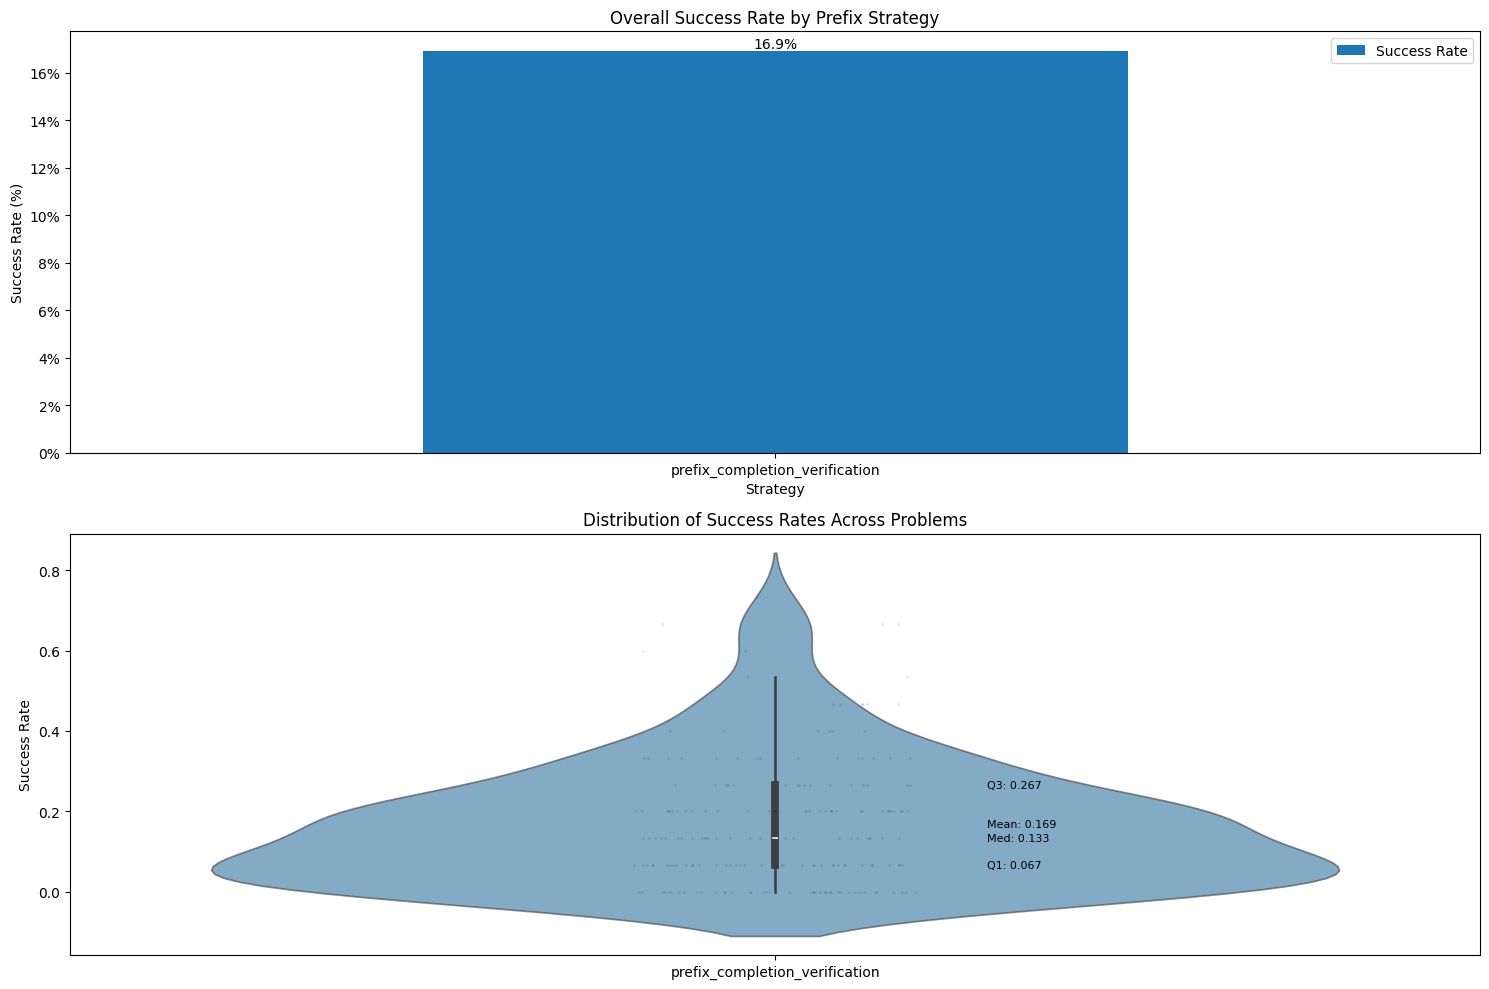


Overall Success Rates:
                                Success Rate
prefix_completion_verification      0.168935

Per-Strategy Statistics across Problems:
       prefix_completion_verification
count                      191.000000
mean                         0.168935
std                          0.158171
min                          0.000000
25%                          0.066667
50%                          0.133333
75%                          0.266667
max                          0.733333


In [36]:
plot_prefix_strategy_comparison(
    static_df,
    verification_columns=["prefix_completion_verification"],
    name="Static"
)